In [561]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [562]:
df = pd.read_csv("student_performance.csv")
df.head()
print(df.shape)

(10000, 6)


In [563]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [564]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({'Yes': 1, 'No': 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [565]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [566]:
model.coef_

array([2.85298205, 1.01843419, 0.61289758, 0.48055975, 0.19380214])

In [567]:
model.intercept_
model.predict([[7,99,1,9,1]])

C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.85200884])

### Scaling Features for Better Performance
*Note*: This also convert dataframe into numpy arrays

In [568]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit and transform
X_scaled = x_scaler.fit_transform(X)
y = y.values.reshape(-1, 1)
y_scaled = y_scaler.fit_transform(y)
print('Featues Array:\n', X_scaled)
print('Target Array:\n', y_scaled)

Featues Array:
 [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 ...
 [ 0.38896495  0.7815752   1.01045465  0.86650484  0.1453332 ]
 [ 1.54763324  1.5888506   1.01045465  0.27680507 -1.59852572]
 [ 0.77518771  0.26261245 -0.98965352  0.86650484 -1.24975394]]
Target Array:
 [[ 1.86216688]
 [ 0.50881766]
 [-0.5322202 ]
 ...
 [ 0.9772847 ]
 [ 2.07037446]
 [ 0.45676577]]


In [569]:
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)
model_scaled.coef_
sample_input = x_scaler.transform(np.array([[4,82,0,4,2]]))
pred_scaled = model_scaled.predict(sample_input)
pred_original = y_scaler.inverse_transform(pred_scaled)
print("Predicted Performance Index:", pred_original[0][0])

Predicted Performance Index: 63.15778719259662


C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Batch Gradent Descent Implemenation on the Data Set

In [570]:
def batch_gradient_descent(X, y, epochs=100, lr=0.1):
    # Initialize weights (including bias term)
    w = np.zeros((X.shape[1] + 1, 1))
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    cost_history = []

    for _ in range(epochs):
        predictions = X @ w
        errors = predictions - y
        gradients = (2 / X.shape[0]) * (X.T @ errors)
        w -= lr * gradients

        cost = (1 / X.shape[0]) * np.sum(errors ** 2)
        cost_history.append(cost)
    
    return w, cost_history

def predict(X, w, y_scaler=None):
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
    preds = np.dot(X, w)
    return y_scaler.inverse_transform(preds) if y_scaler else preds

In [571]:
coef, cost_hist = batch_gradient_descent(X_scaled ,y_scaled , 100)
student = np.array([[7, 99, 1, 9, 1]])            # Raw input
student_scaled = x_scaler.transform(student)      # Scaled input
prediction = predict(student_scaled, coef, y_scaler)
print("Predicted Performance Index:", prediction[0][0])

Predicted Performance Index: 91.85200882826699


C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


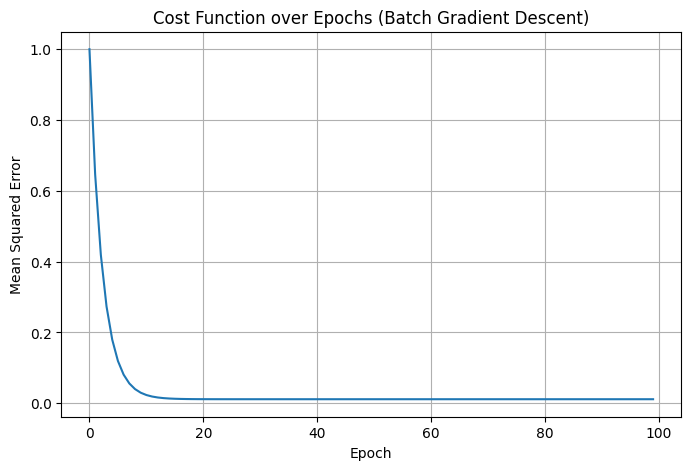

In [572]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_hist)), cost_hist)
plt.title("Cost Function over Epochs (Batch Gradient Descent)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

### Stocastic Gradient Descent

In [573]:
import random
def stochastic_gradient_descent(X, y, epochs=1000, lr=0.1):
    nsamples = X.shape[0]

    if y.ndim == 1:
        y = y.reshape(-1, 1)

    w = np.zeros((X.shape[1] + 1, 1))  # Including bias
    X = np.hstack([np.ones((nsamples, 1)), X])  # Add bias column
    cost_history = []

    for _ in range(epochs):
        rand_row = np.random.randint(nsamples)
        x_i = X[rand_row:rand_row+1]   # (1, n)
        y_i = y[rand_row:rand_row+1]   # (1, 1)

        prediction = x_i @ w
        error = prediction - y_i
        gradient = 2 * x_i.T @ error
        w -= lr * gradient

        # Compute full cost for monitoring
        full_prediction = X @ w
        full_error = full_prediction - y
        cost = (1 / nsamples) * np.sum(full_error ** 2)
        cost_history.append(cost)

    return w, cost_history

In [574]:
coef, cost_hist = stochastic_gradient_descent(X_scaled, y_scaled, 100)
coef
student = np.array([[7, 99, 1, 9, 1]])            
student_scaled = x_scaler.transform(student)      
prediction = predict(student_scaled, coef, y_scaler)
print("Predicted Performance Index:", prediction[0][0])

Predicted Performance Index: 89.83453657682703


C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


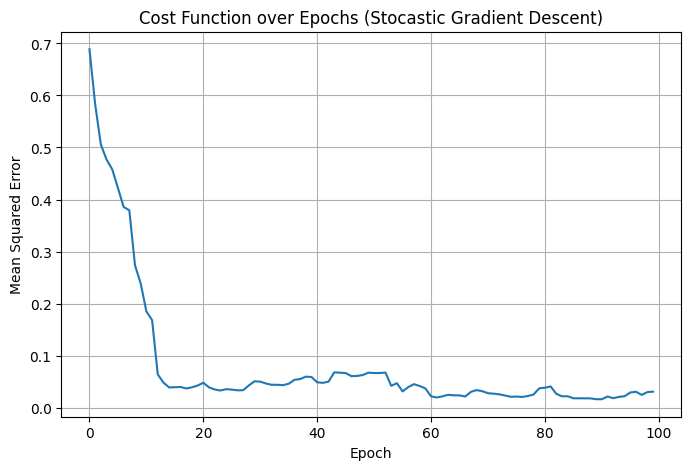

In [575]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_hist)), cost_hist)
plt.title("Cost Function over Epochs (Stocastic Gradient Descent)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

### Mini Batch Gradient Descent

In [576]:
def mini_batch_sgd(X, y, epochs=1000, lr=0.1, batch_size=10):
    nsamples = X.shape[0]

    if y.ndim == 1:
        y = y.reshape(-1, 1)

    w = np.zeros((X.shape[1] + 1, 1))  # Including bias
    X = np.hstack([np.ones((nsamples, 1)), X]) 
    cost_history = []

    for _ in range(epochs):
        indices = np.random.choice(nsamples, size=batch_size, replace=False)
        x_batch = X[indices]          
        y_batch = y[indices]           

        prediction = x_batch @ w       
        error = prediction - y_batch   
        gradient = (2 / batch_size) * x_batch.T @ error
        w -= lr * gradient

        full_prediction = X @ w
        full_error = full_prediction - y
        cost = (1 / nsamples) * np.sum(full_error ** 2)
        cost_history.append(cost)

    return w, cost_history

In [577]:
coef, cost_hist = mini_batch_sgd(X_scaled, y_scaled, 100)
coef
student = np.array([[7, 99, 1, 9, 1]])            
student_scaled = x_scaler.transform(student)      
prediction = predict(student_scaled, coef, y_scaler)
print("Predicted Performance Index:", prediction[0][0])

Predicted Performance Index: 92.37072070352798


C:\Users\Sumit Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


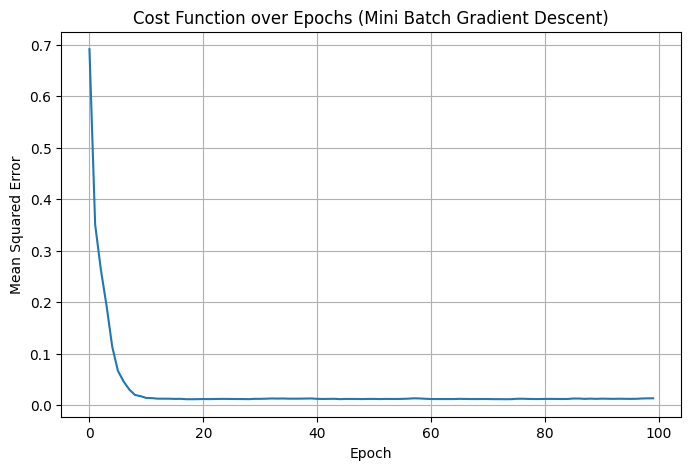

In [578]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_hist)), cost_hist)
plt.title("Cost Function over Epochs (Mini Batch Gradient Descent)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()